<a href="https://colab.research.google.com/github/kkeenchs/Datamining_final_project/blob/main/Uber_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import File

In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub

# ดาวน์โหลด dataset จาก Kaggle
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'uber-ride-analytics-dashboard' dataset.
Path to dataset files: /kaggle/input/uber-ride-analytics-dashboard


In [ ]:
import os
os.listdir(path)
# ตรวจดูไฟล์ใน path ว่ามีอะไรบ้าง

['ncr_ride_bookings.csv', 'Dasboard.gif', 'Uber.pbix']

# Explore Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv(f"{path}/ncr_ride_bookings.csv")

In [ ]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


## fillna part

In [ ]:
# เเทนที่ค่าในช่องที่ว่างด้วย 0
df['Avg VTAT'] = df['Avg VTAT'].fillna(0)
df['Avg CTAT'] = df['Avg CTAT'].fillna(0)
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0)
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0)
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0)
df['Booking Value'] = df['Booking Value'].fillna(0)
df['Ride Distance'] = df['Ride Distance'].fillna(0)
df['Driver Ratings'] = df['Driver Ratings'].fillna(0)
df['Customer Rating'] = df['Customer Rating'].fillna(0)
# เเทนที่ค่าในช่องที่ว่างด้วย "..."
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna("No Reason")
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna("No Reason")
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna("No Reason")
df['Payment Method'] = df['Payment Method'].fillna("Undefined")

In [ ]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,7.864407,19.821753,0.070000,0.180000,0.060000,345.641220,16.753168,2.623215,2.730842
std,4.230640,15.452834,0.255148,0.384189,0.237488,403.423487,16.291118,2.082283,2.165548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.800000,22.000000,0.000000,0.000000,0.000000,244.000000,13.060000,3.900000,4.100000
75%,11.000000,32.900000,0.000000,0.000000,0.000000,521.000000,30.650000,4.300000,4.600000
max,20.000000,45.000000,1.000000,1.000000,1.000000,4277.000000,50.000000,5.000000,5.000000


In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0


## Plot Data Informations



In [ ]:
cat_cols = ['Vehicle Type', 'Payment Method', 'Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason','Booking Status']
num_cols = [ 'Avg VTAT', 'Avg CTAT', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
bi_cols = ['Cancelled Rides by Customer', 'Cancelled Rides by Driver','Incomplete Rides']

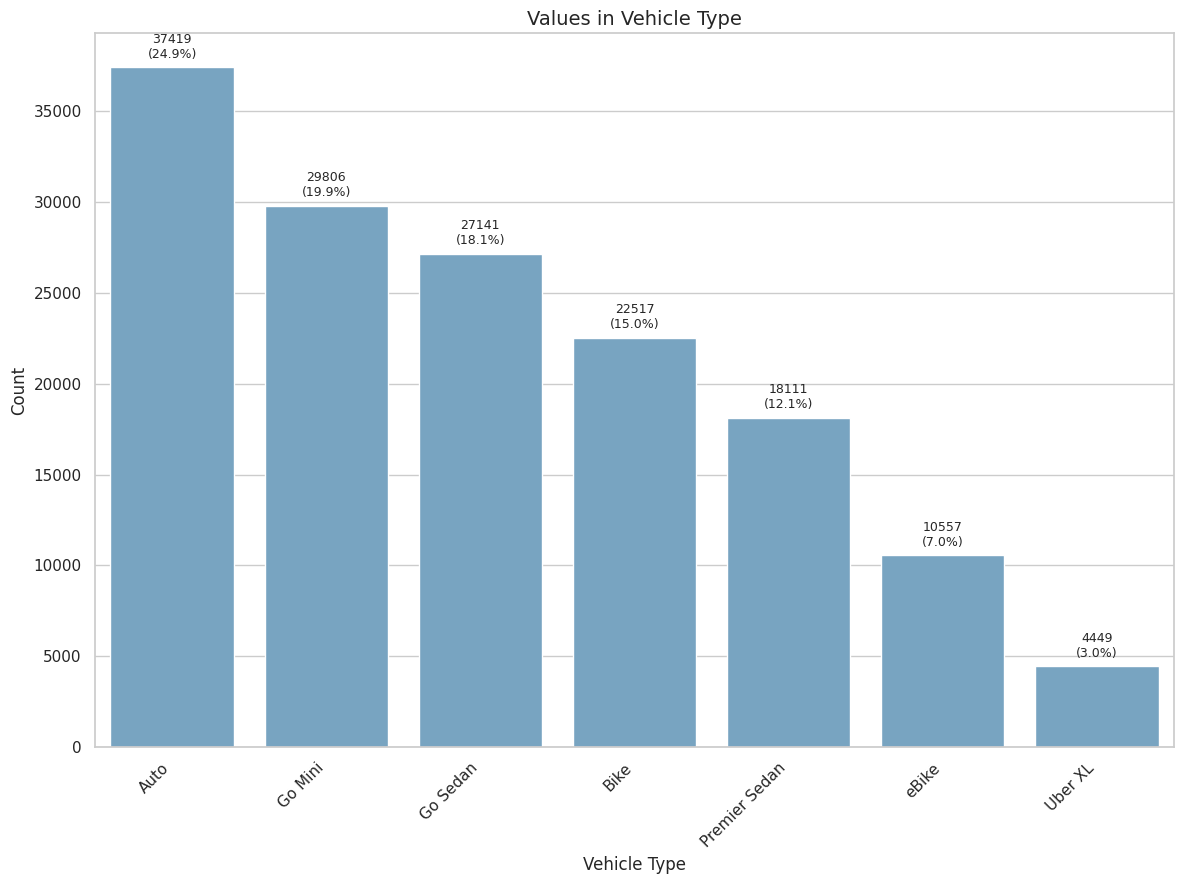

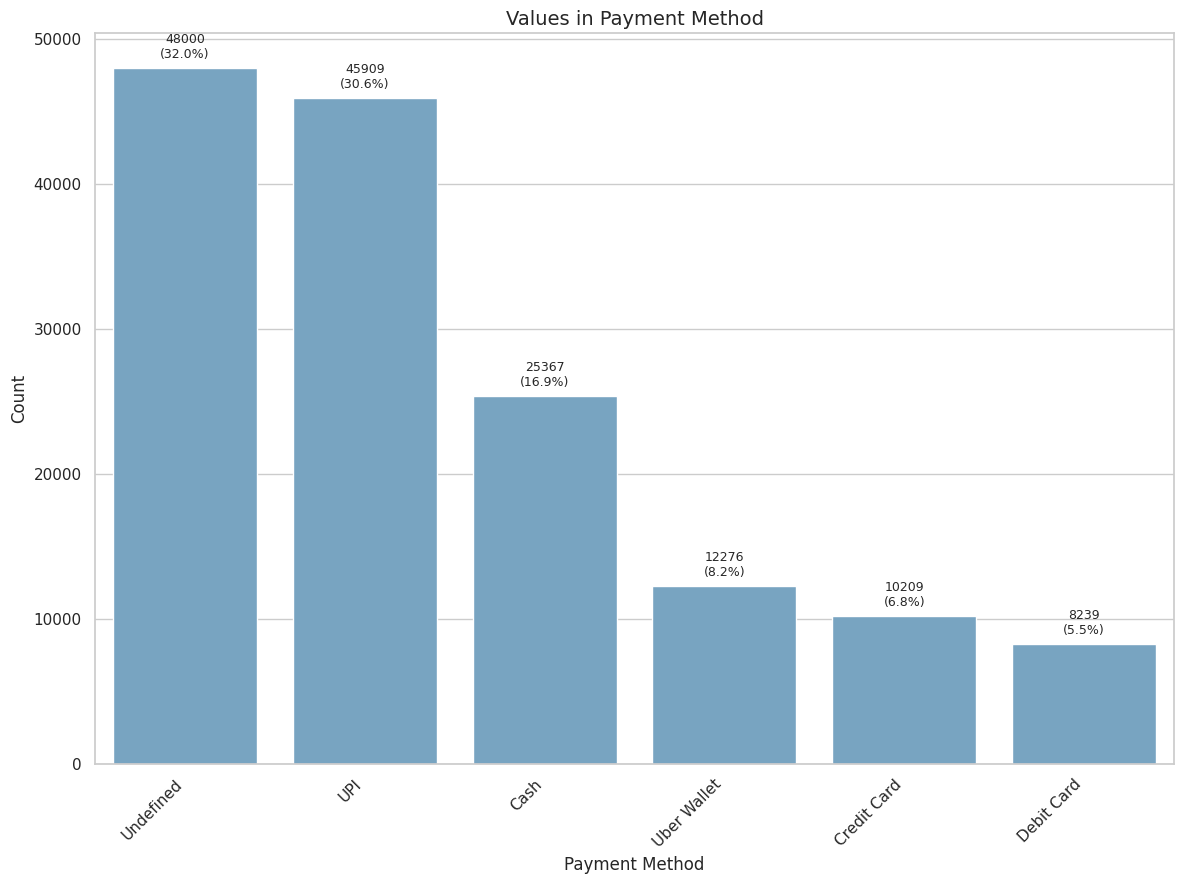

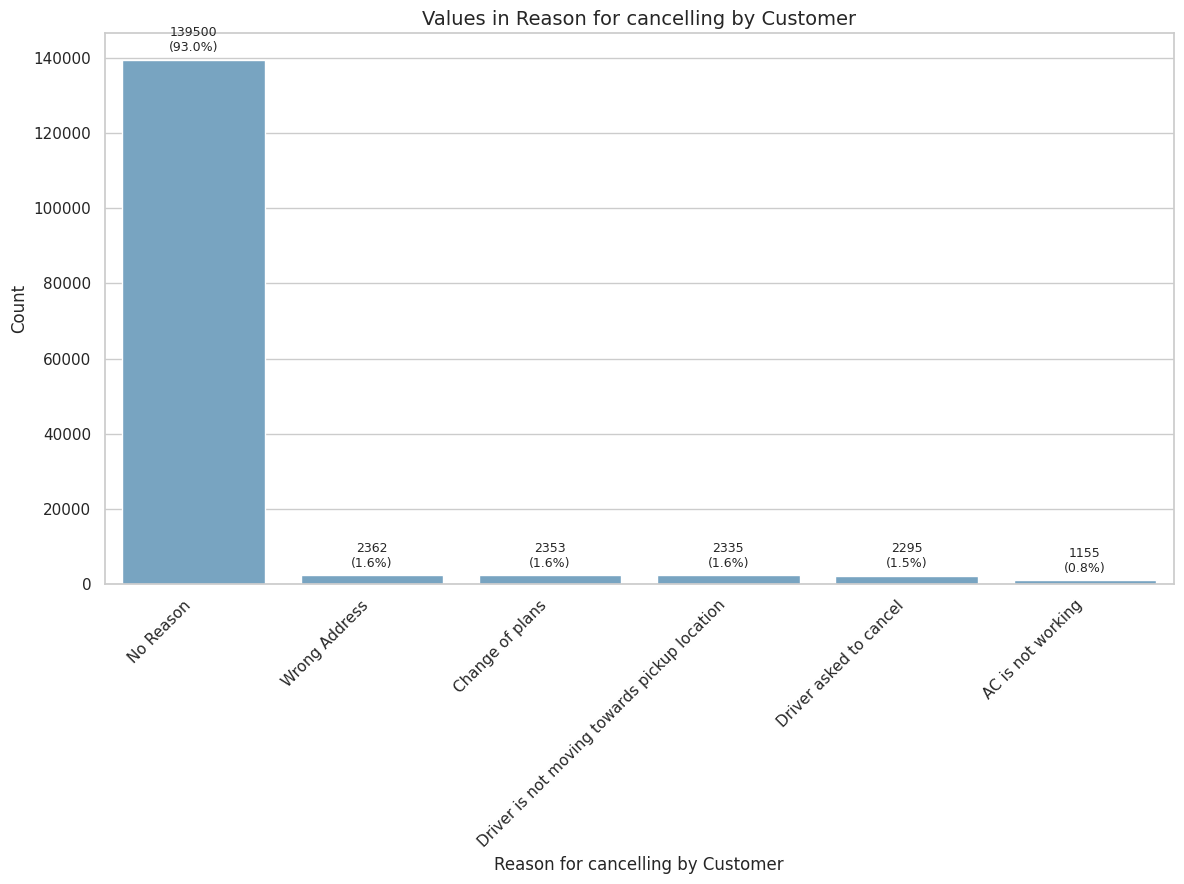

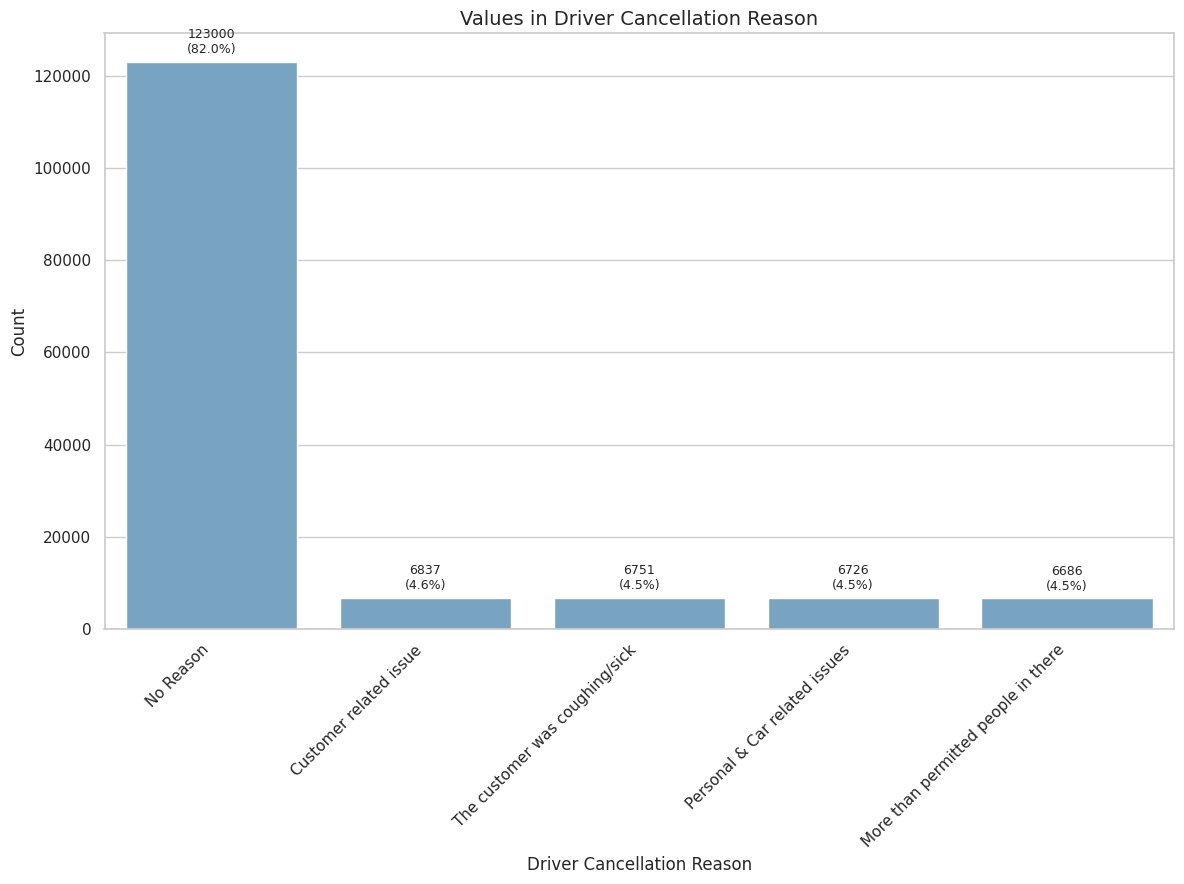

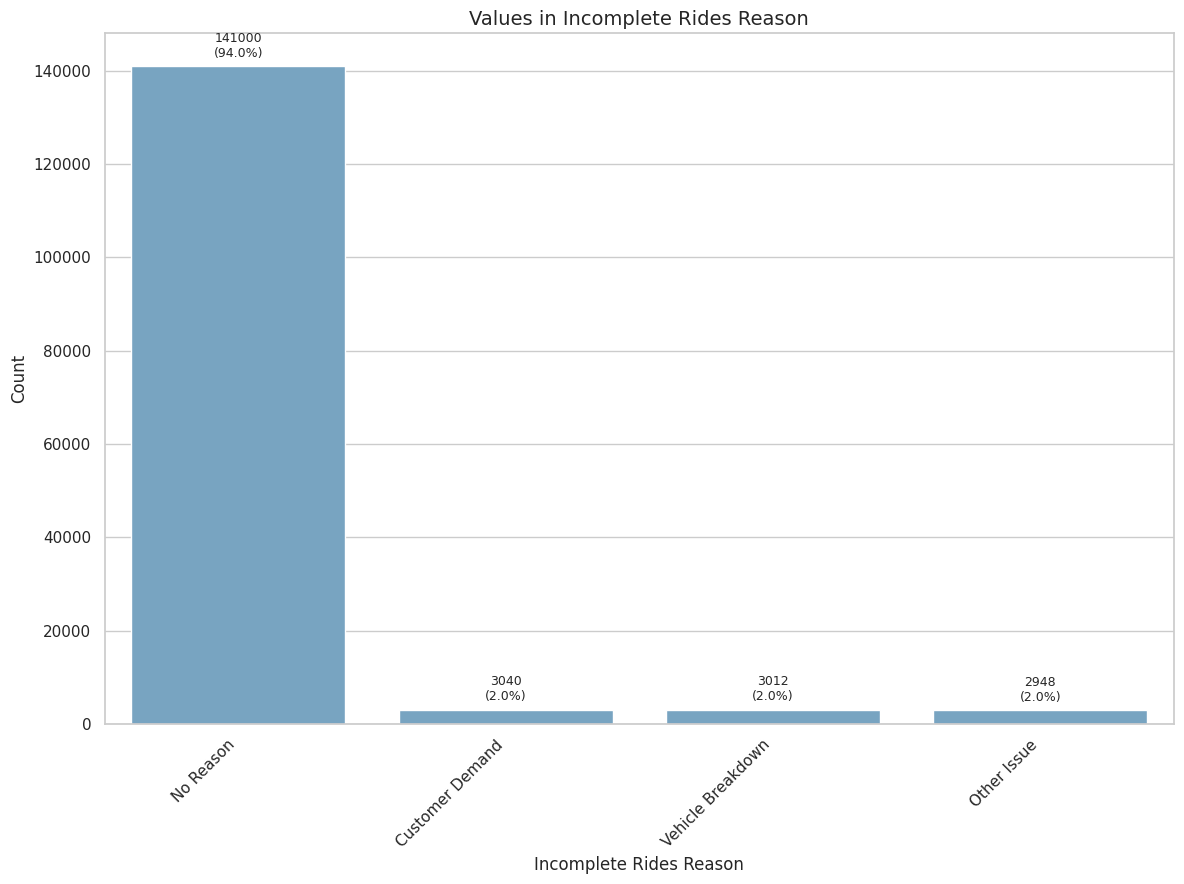

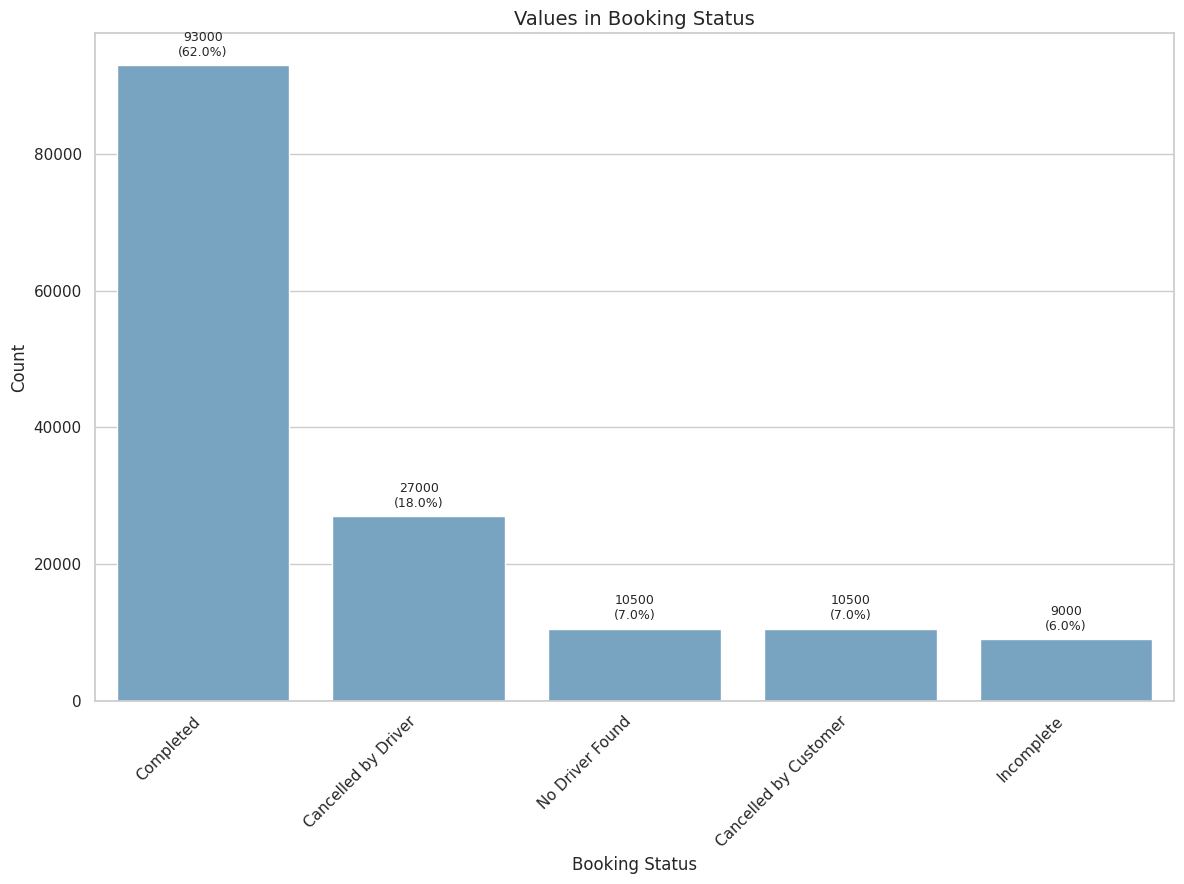

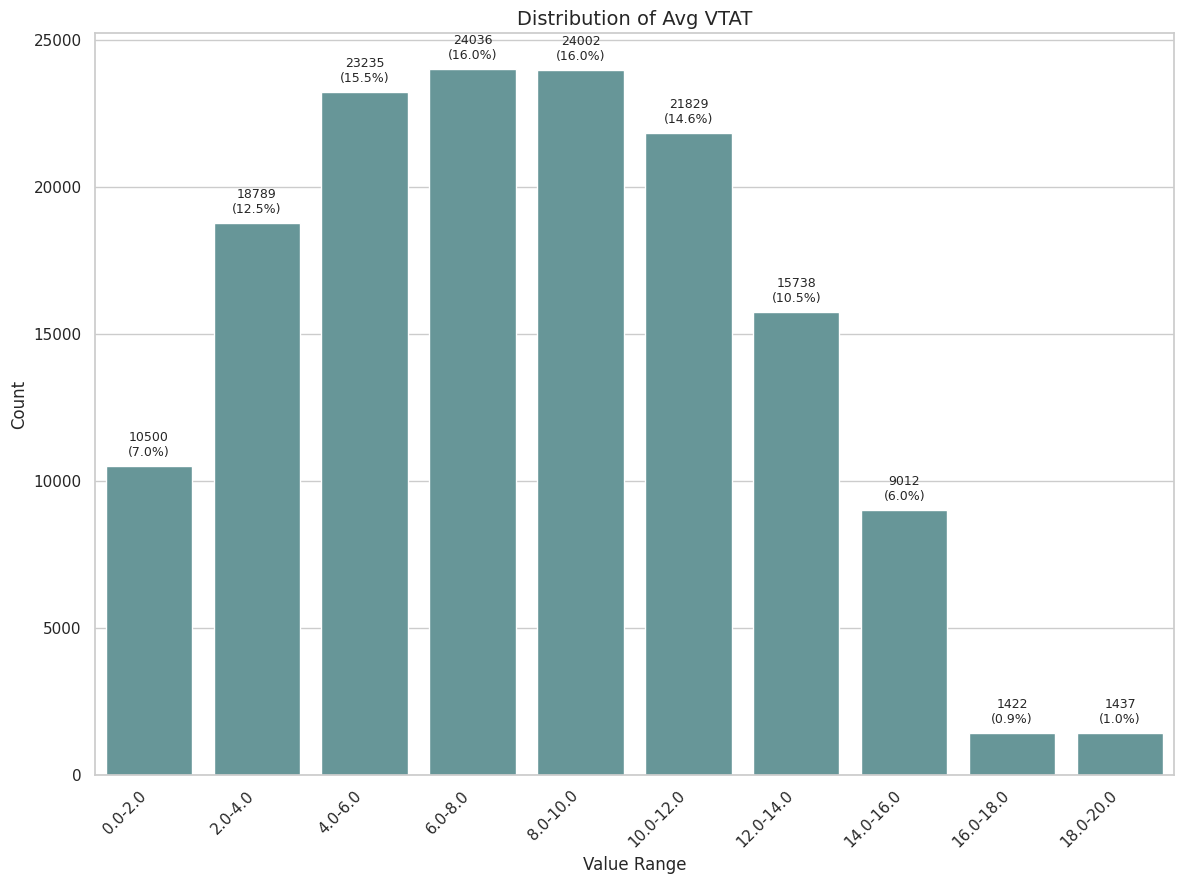

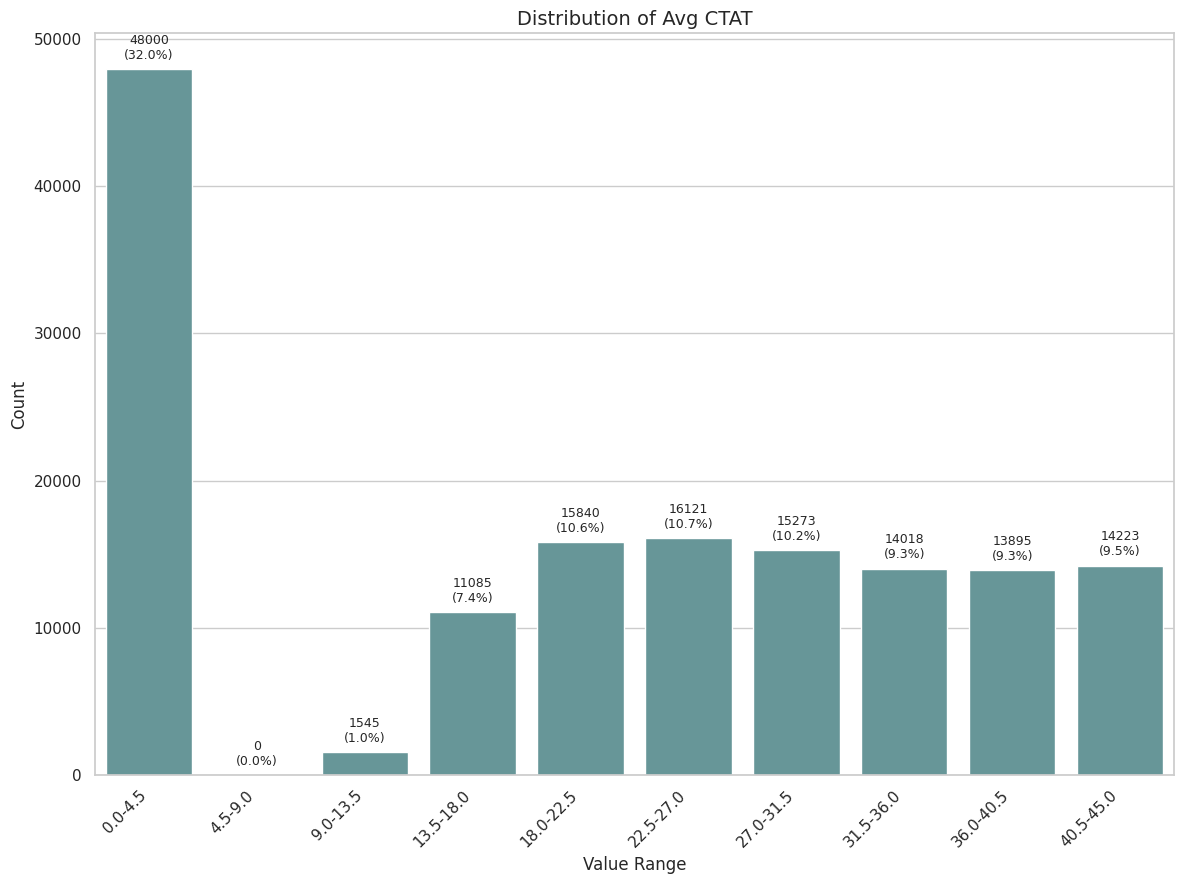

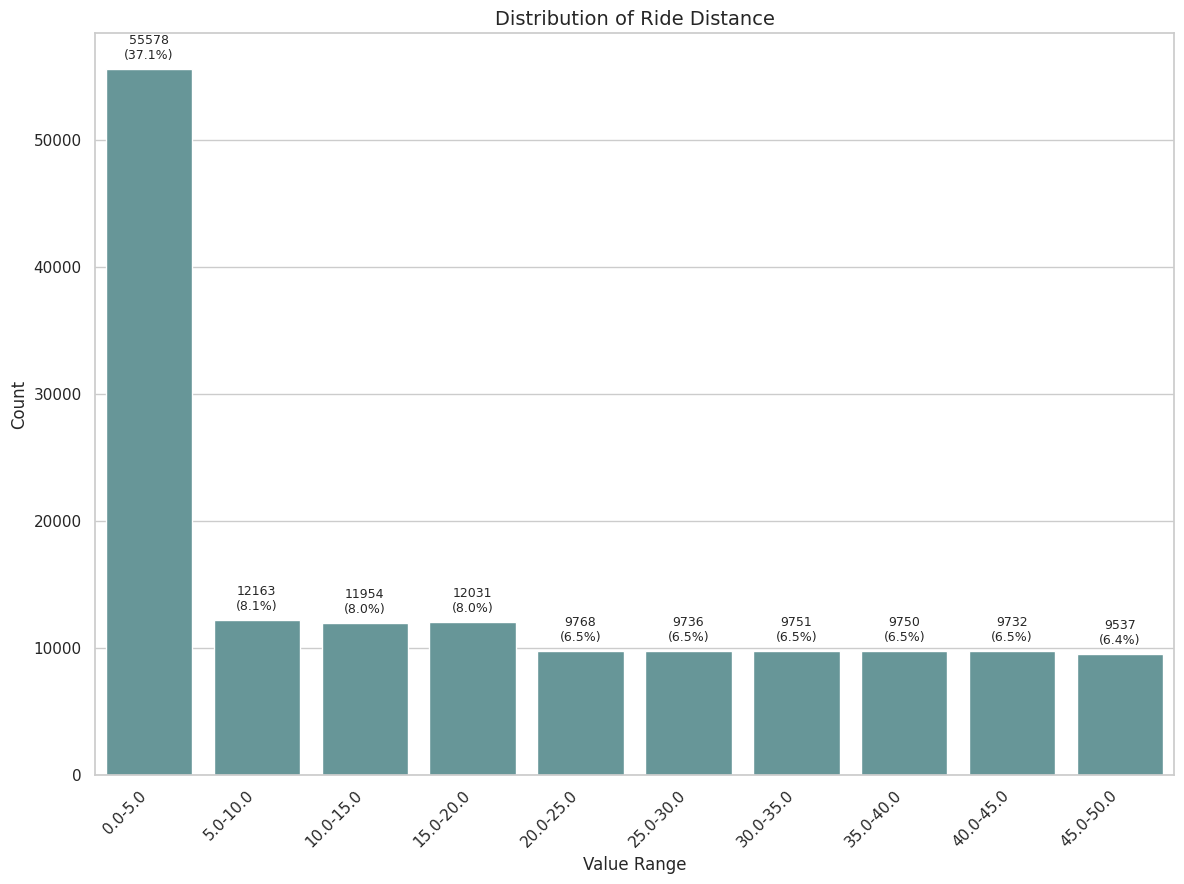

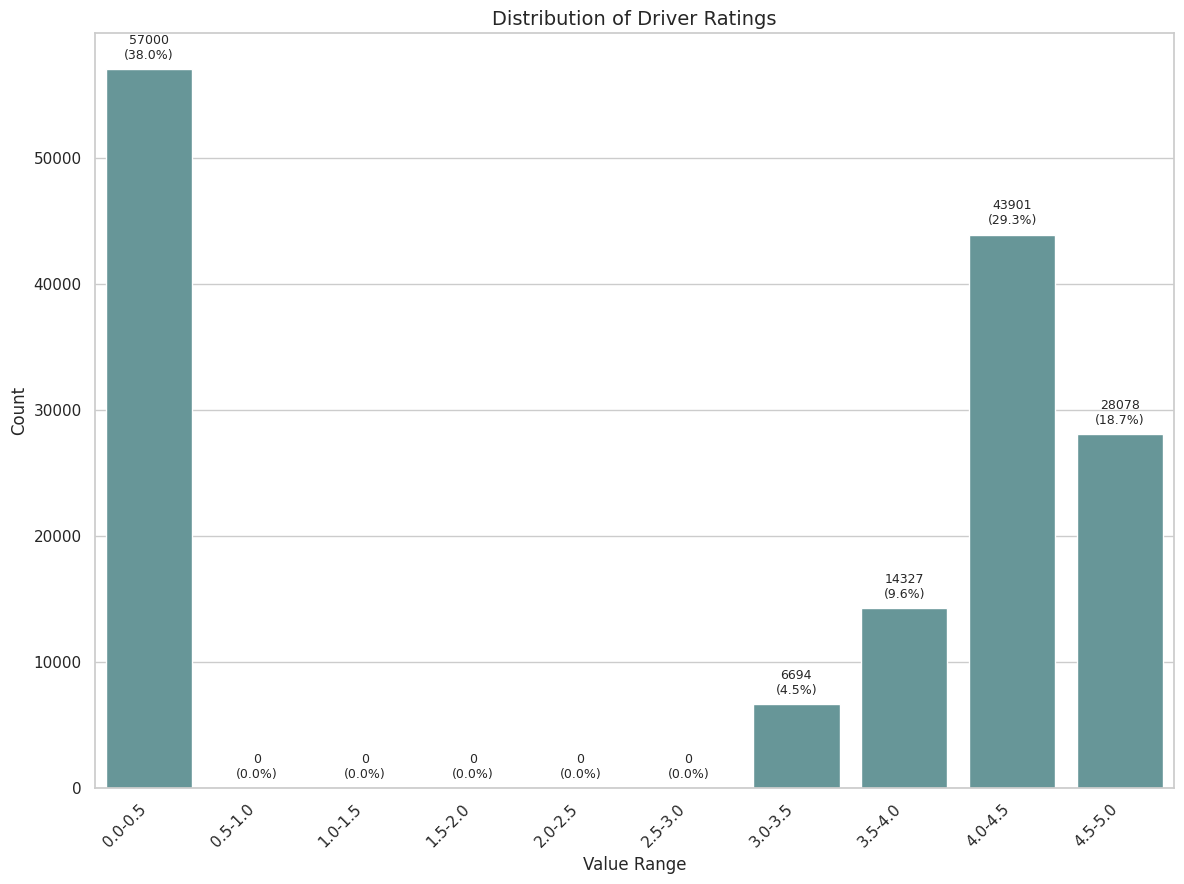

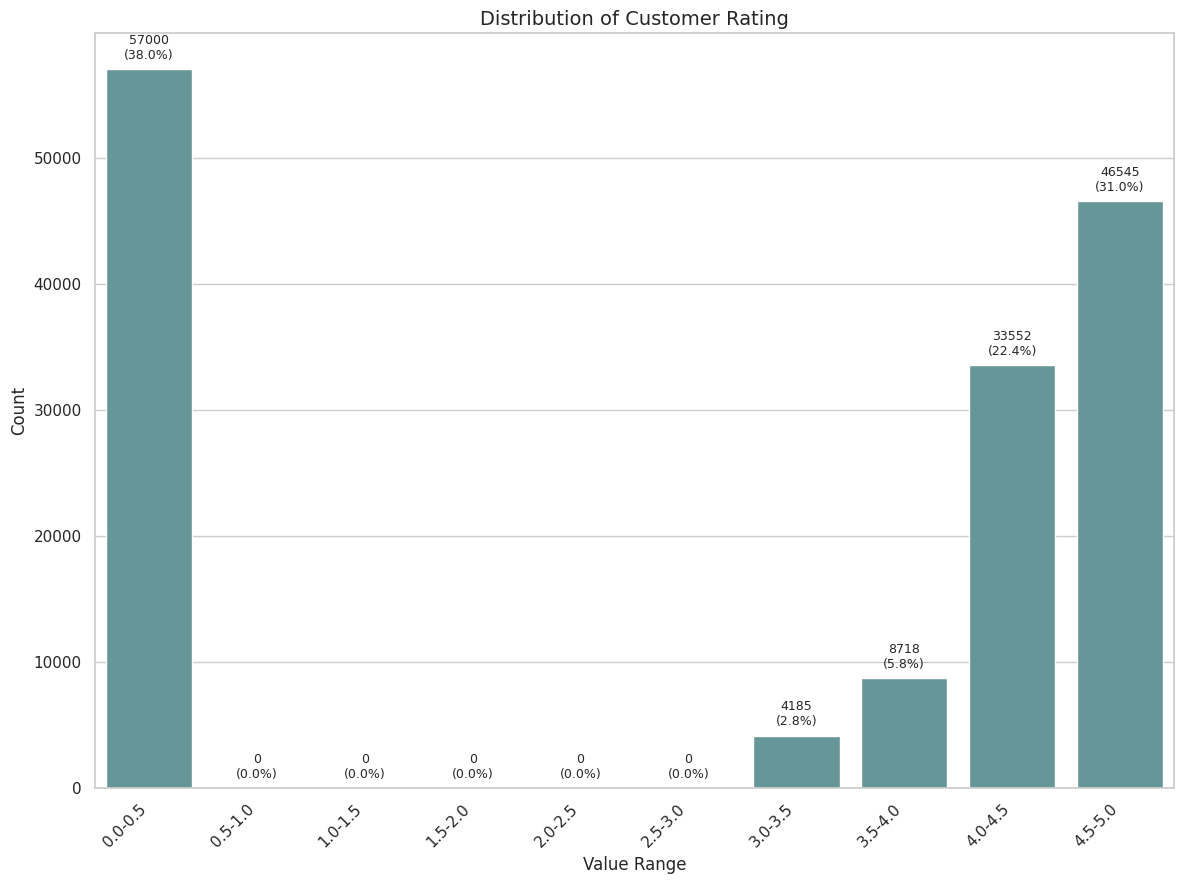

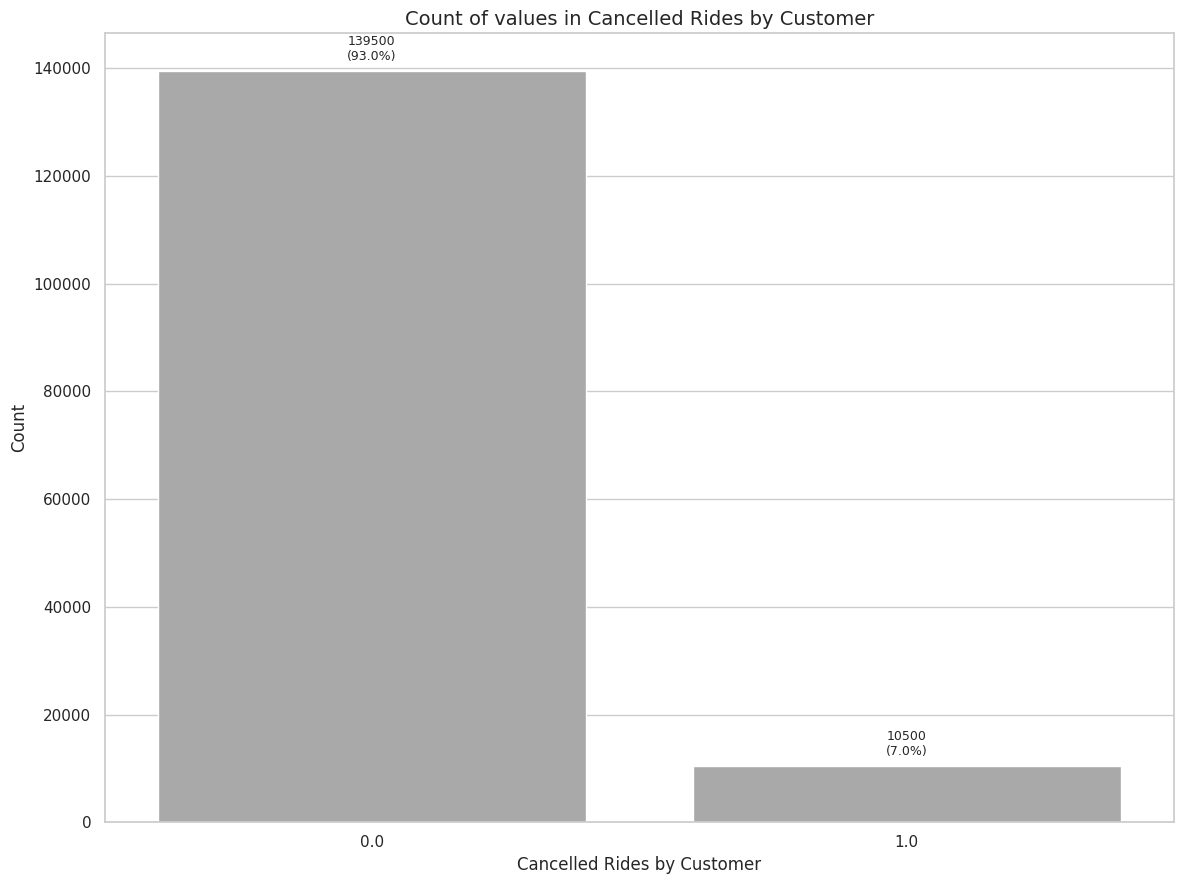

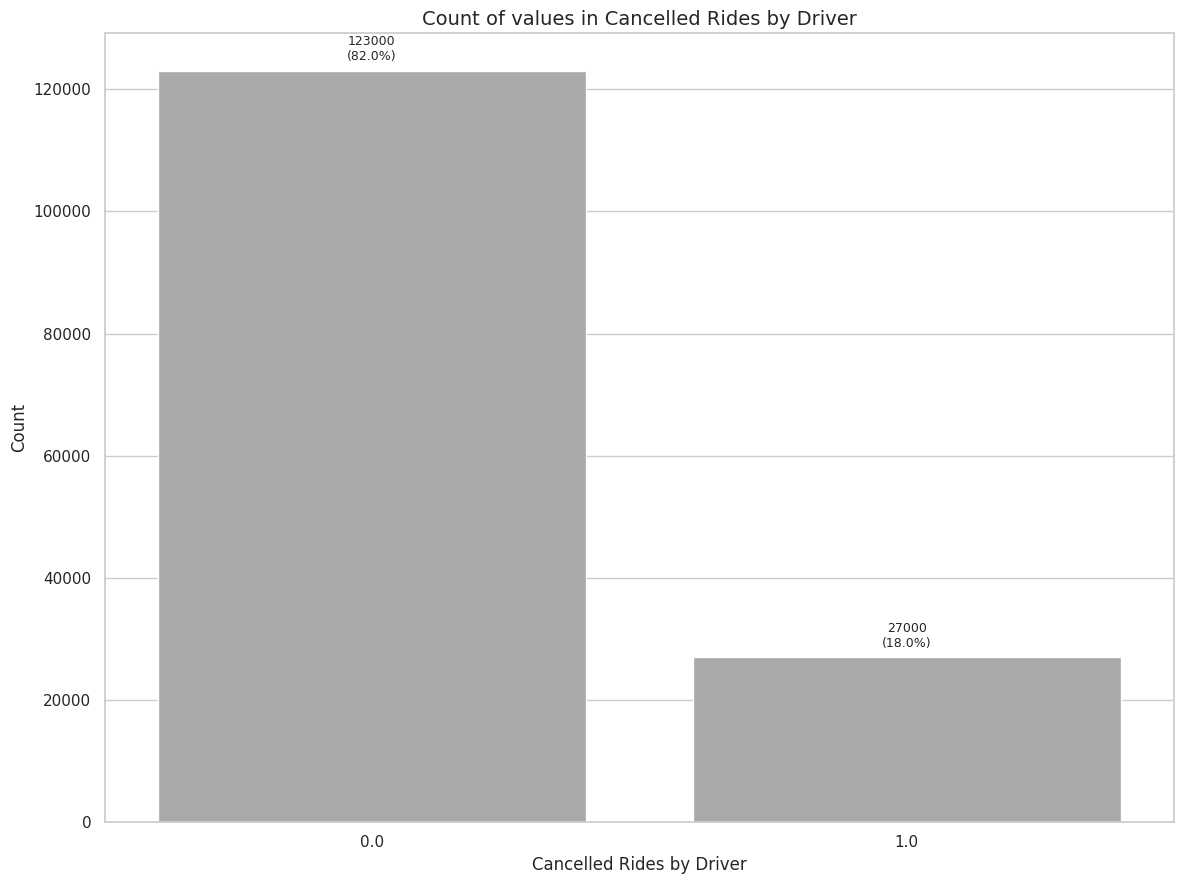

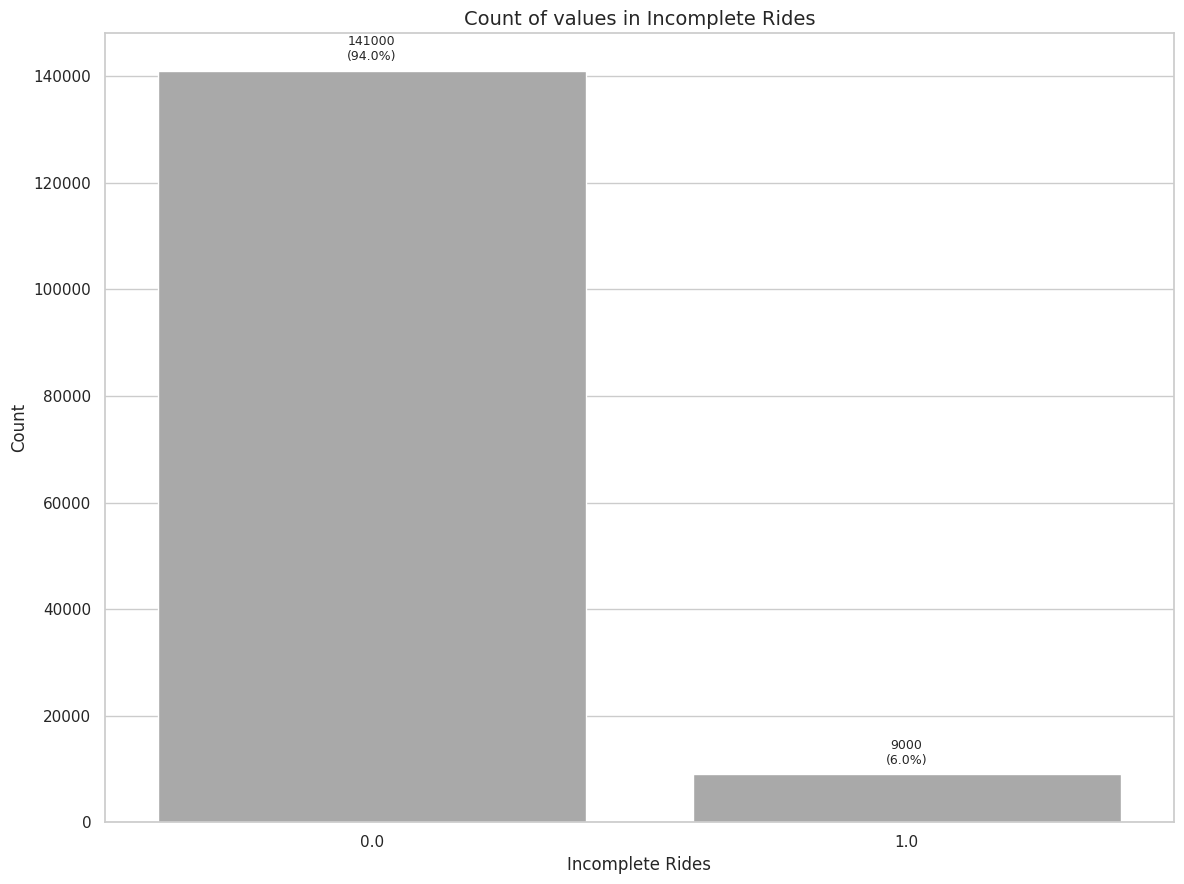

In [ ]:
sns.set(style="whitegrid")

# ------------------------------
# Categorical Columns
# ------------------------------
for col in cat_cols:
    plt.figure(figsize=(12,9))
    value_counts = df[col].value_counts()
    total = value_counts.sum()  # รวมทั้งหมด

    ax = sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        color="#6CA6CD"
    )

    plt.title(f"Values in {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

    # แสดงตัวเลขและเปอร์เซ็นต์บนแท่ง
    for i, val in enumerate(value_counts.values):
        percent = (val / total) * 100
        ax.text(i, val + max(value_counts.values)*0.01,
                f"{val}\n({percent:.1f}%)",
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


# ------------------------------
# Numeric Columns (แบ่งเป็นช่วง)
# ------------------------------
for col in num_cols:
    plt.figure(figsize=(12,9))
    bins = 10
    counts, edges = np.histogram(df[col], bins=bins)
    total = counts.sum()
    labels = [f"{edges[i]:.1f}-{edges[i+1]:.1f}" for i in range(len(edges)-1)]

    ax = sns.barplot(
        x=labels,
        y=counts,
        color="#5F9EA0"
    )

    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel("Value Range")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')

    # แสดงจำนวนและเปอร์เซ็นต์
    for i, val in enumerate(counts):
        percent = (val / total) * 100
        ax.text(i, val + max(counts)*0.01,
                f"{val}\n({percent:.1f}%)",
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


# ------------------------------
# Binary Columns
# ------------------------------
for col in bi_cols:
    plt.figure(figsize=(12,9))
    value_counts = df[col].value_counts()
    total = value_counts.sum()

    ax = sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        color="#A9A9A9"
    )

    plt.title(f"Count of values in {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)

    # แสดงจำนวนและเปอร์เซ็นต์
    for i, val in enumerate(value_counts.values):
        percent = (val / total) * 100
        ax.text(i, val + max(value_counts.values)*0.01,
                f"{val}\n({percent:.1f}%)",
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


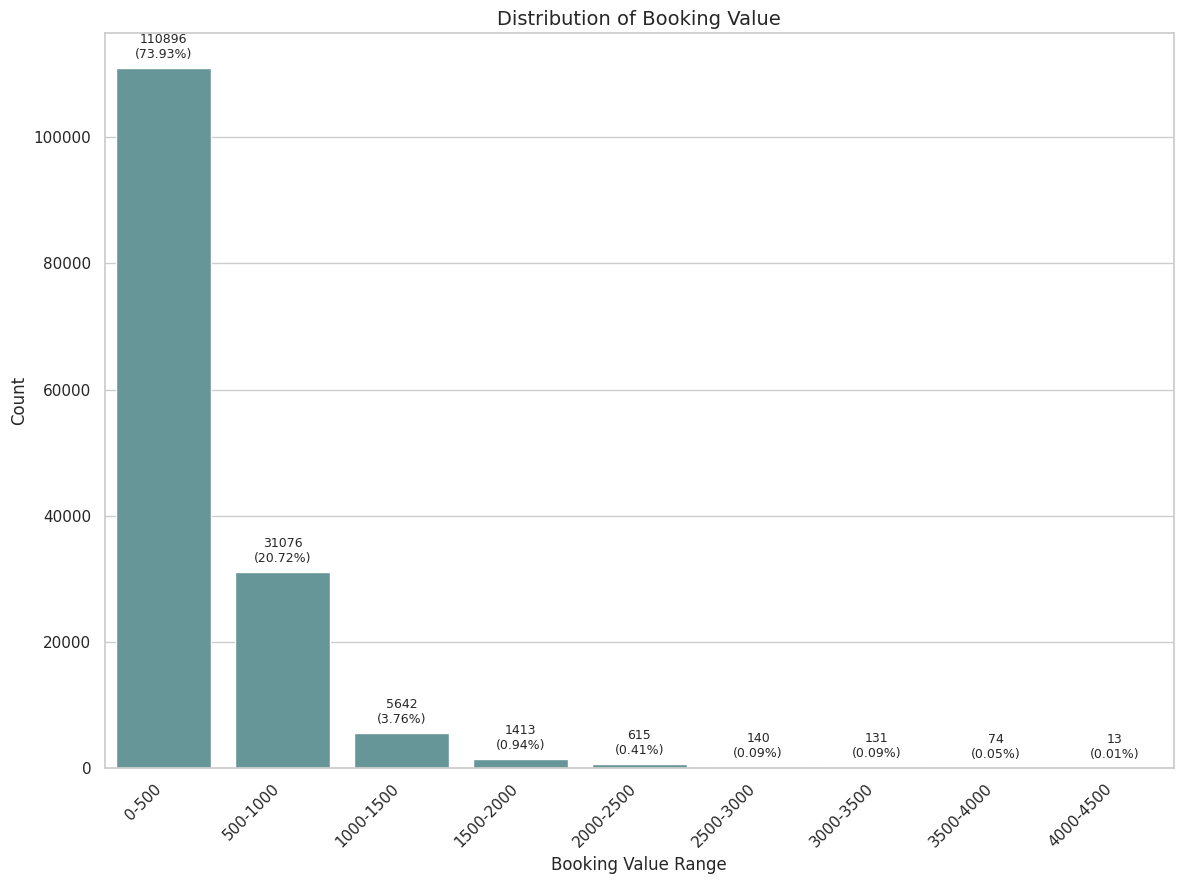

In [ ]:
sns.set(style="whitegrid")

col = 'Booking Value'

min_val = df[col].min()
max_val = df[col].max()

bin_width = 500
bins = np.arange(min_val, max_val + bin_width, bin_width)

counts, edges = np.histogram(df[col], bins=bins)
total = counts.sum()
labels = [f"{int(edges[i])}-{int(edges[i+1])}" for i in range(len(edges)-1)]

# วาดกราฟ
plt.figure(figsize=(12,9))
ax = sns.barplot(x=labels, y=counts, color="#5F9EA0")

plt.title("Distribution of Booking Value", fontsize=14)
plt.xlabel("Booking Value Range")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

for i, val in enumerate(counts):
    percent = (val / total) * 100
    ax.text(i, val + max(counts)*0.01,
            f"{val}\n({percent:.2f}%)",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



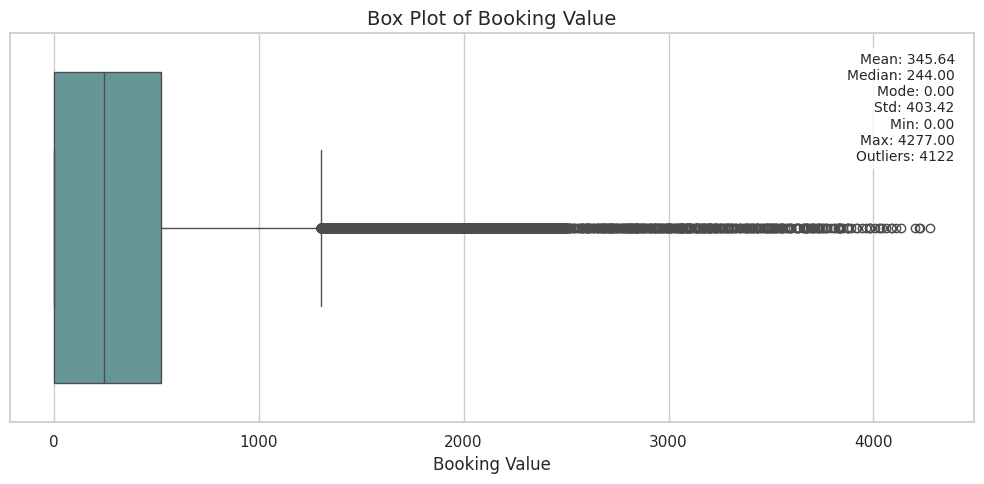

In [ ]:
col = 'Booking Value'
sns.set(style="whitegrid")

# ---------------------------
# คำนวณค่าสถิติพื้นฐาน
# ---------------------------
mean_val = df[col].mean()
median_val = df[col].median()
mode_val = df[col].mode()[0]
std_val = df[col].std()
min_val = df[col].min()
max_val = df[col].max()

# ---------------------------
# คำนวณจำนวน outlier ด้วย IQR
# ---------------------------
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
outlier_count = outliers.shape[0]

# ---------------------------
# Plot boxplot
# ---------------------------
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=df[col], color="#5F9EA0")

plt.title(f"Box Plot of {col}", fontsize=14)
plt.xlabel(f"{col}")

# ---------------------------
# แสดงข้อความสถิติบนกราฟ
# ---------------------------
textstr = (
    f"Mean: {mean_val:.2f}\n"
    f"Median: {median_val:.2f}\n"
    f"Mode: {mode_val:.2f}\n"
    f"Std: {std_val:.2f}\n"
    f"Min: {min_val:.2f}\n"
    f"Max: {max_val:.2f}\n"
    f"Outliers: {outlier_count}"
)

plt.text(
    0.98, 0.95, textstr,
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

In [ ]:
bins = [0, 4.5, 9, 13.5, 18, 22.5, 27, 31.5, 36, 40.5, 45]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_ctat_bins = df.copy()
df_ctat_bins['CTAT Range'] = pd.cut(df_ctat_bins['Avg CTAT'], bins=bins, labels=labels, include_lowest=True)

# Group ตามช่วง แล้วนับ Booking Status
ctat_status_summary = (
    df_ctat_bins.groupby(['CTAT Range', 'Booking Status'])
    .size()
    .unstack(fill_value=0)
)

ctat_status_summary['Total %'] = ctat_status_summary.sum(axis=1)
ctat_status_summary_percent = (ctat_status_summary.div(ctat_status_summary['Total %'], axis=0) * 100).round(2)

print(ctat_status_summary_percent)


Booking Status  Cancelled by Customer  Cancelled by Driver  Completed  \
CTAT Range                                                              
0-4.5                           21.88                56.25       0.00   
4.5-9                             NaN                  NaN        NaN   
9-13.5                           0.00                 0.00       0.00   
13.5-18                          0.00                 0.00      81.95   
18-22.5                          0.00                 0.00      87.60   
22.5-27                          0.00                 0.00      87.11   
27-31.5                          0.00                 0.00      91.38   
31.5-36                          0.00                 0.00     100.00   
36-40.5                          0.00                 0.00     100.00   
40.5-45                          0.00                 0.00     100.00   

Booking Status  Incomplete  No Driver Found  Total %  
CTAT Range                                            
0-4.5        

/tmp/ipython-input-2347503784.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ctat_bins.groupby(['CTAT Range', 'Booking Status'])


In [ ]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_cus_bins = df.copy()
df_cus_bins['Customer Rating Range'] = pd.cut(
    df_cus_bins['Customer Rating'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

cus_status_summary = (
    df_cus_bins.groupby(['Customer Rating Range', 'Booking Status'])
    .size()
    .unstack(fill_value=0)
)

cus_status_summary['Total'] = cus_status_summary.sum(axis=1)

cus_status_summary_percent = (
    cus_status_summary.div(cus_status_summary['Total'], axis=0) * 100
).round(2)

print(cus_status_summary_percent)


Booking Status         Cancelled by Customer  Cancelled by Driver  Completed  \
Customer Rating Range                                                          
0-0.5                                  18.42                47.37        0.0   
0.5-1                                    NaN                  NaN        NaN   
1-1.5                                    NaN                  NaN        NaN   
1.5-2                                    NaN                  NaN        NaN   
2-2.5                                    NaN                  NaN        NaN   
2.5-3                                   0.00                 0.00      100.0   
3-3.5                                   0.00                 0.00      100.0   
3.5-4                                   0.00                 0.00      100.0   
4-4.5                                   0.00                 0.00      100.0   
4.5-5                                   0.00                 0.00      100.0   

Booking Status         Incomplete  No D

/tmp/ipython-input-1504354568.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cus_bins.groupby(['Customer Rating Range', 'Booking Status'])


In [ ]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_driver_bins = df.copy()
df_driver_bins['Driver Rating Range'] = pd.cut(
    df_driver_bins['Driver Ratings'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

dri_status_summary = (
    df_driver_bins.groupby(['Driver Rating Range', 'Booking Status'])
    .size()
    .unstack(fill_value=0)
)

dri_status_summary['Total'] = dri_status_summary.sum(axis=1)

dri_status_summary_percent = (
    dri_status_summary.div(dri_status_summary['Total'], axis=0) * 100
).round(2)

print(dri_status_summary_percent)

Booking Status       Cancelled by Customer  Cancelled by Driver  Completed  \
Driver Rating Range                                                          
0-0.5                                18.42                47.37        0.0   
0.5-1                                  NaN                  NaN        NaN   
1-1.5                                  NaN                  NaN        NaN   
1.5-2                                  NaN                  NaN        NaN   
2-2.5                                  NaN                  NaN        NaN   
2.5-3                                 0.00                 0.00      100.0   
3-3.5                                 0.00                 0.00      100.0   
3.5-4                                 0.00                 0.00      100.0   
4-4.5                                 0.00                 0.00      100.0   
4.5-5                                 0.00                 0.00      100.0   

Booking Status       Incomplete  No Driver Found  Total  
Drive

/tmp/ipython-input-2401568031.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_driver_bins.groupby(['Driver Rating Range', 'Booking Status'])


In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_dist_bins = df.copy()
df_dist_bins['Ride Distance Range'] = pd.cut(
    df_dist_bins['Ride Distance'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

dist_status_summary = (
    df_dist_bins.groupby(['Ride Distance Range', 'Booking Status'])
    .size()
    .unstack(fill_value=0)
)
dist_status_summary['Total'] = dist_status_summary.sum(axis=1)

dist_status_summary_percent = (
    dist_status_summary.div(dist_status_summary['Total'], axis=0) * 100
).round(2)

print(dist_status_summary_percent)


Booking Status       Cancelled by Customer  Cancelled by Driver  Completed  \
Ride Distance Range                                                          
0-5                                  18.88                48.56      10.41   
5-10                                  0.00                 0.00      80.06   
10-15                                 0.00                 0.00      79.72   
15-20                                 0.00                 0.00      80.59   
20-25                                 0.00                 0.00     100.00   
25-30                                 0.00                 0.00     100.00   
30-35                                 0.00                 0.00     100.00   
35-40                                 0.00                 0.00     100.00   
40-45                                 0.00                 0.00     100.00   
45-50                                 0.00                 0.00     100.00   

Booking Status       Incomplete  No Driver Found  Total  
Ride 

/tmp/ipython-input-1070921105.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist_bins.groupby(['Ride Distance Range', 'Booking Status'])


In [ ]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_value_bins = df.copy()
df_value_bins['Booking Value Range'] = pd.cut(
    df_value_bins['Booking Value'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

value_status_summary = (
    df_value_bins.groupby(['Booking Value Range', 'Booking Status'])
    .size()
    .unstack(fill_value=0)
)

value_status_summary['Total'] = value_status_summary.sum(axis=1)

value_status_summary_percent = (
    value_status_summary.div(value_status_summary['Total'], axis=0) * 100
).round(2)

print(value_status_summary_percent)


Booking Status       Cancelled by Customer  Cancelled by Driver  Completed  \
Booking Value Range                                                          
0-500                                 9.46                24.33      51.75   
500-1000                              0.00                 0.00      91.17   
1000-1500                             0.00                 0.00      90.82   
1500-2000                             0.00                 0.00      91.47   
2000-2500                             0.00                 0.00      90.11   
2500-3000                             0.00                 0.00      97.10   
3000-3500                             0.00                 0.00      88.55   
3500-4000                             0.00                 0.00      93.24   
4000-4500                             0.00                 0.00     100.00   

Booking Status       Incomplete  No Driver Found  Total  
Booking Value Range                                      
0-500                    

/tmp/ipython-input-3839724326.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_value_bins.groupby(['Booking Value Range', 'Booking Status'])


In [ ]:
df_pay = df.copy()

pay_status_summary = (
    df_pay.groupby(['Payment Method', 'Booking Status'])
    .size()
    .unstack(fill_value=0)
)

pay_status_summary['Total'] = pay_status_summary.sum(axis=1)

pay_status_summary_percent = (
    pay_status_summary.div(pay_status_summary['Total'], axis=0) * 100
).round(2)

print(pay_status_summary_percent)


Booking Status  Cancelled by Customer  Cancelled by Driver  Completed  \
Payment Method                                                          
Cash                             0.00                 0.00      91.12   
Credit Card                      0.00                 0.00      91.29   
Debit Card                       0.00                 0.00      91.35   
UPI                              0.00                 0.00      91.12   
Uber Wallet                      0.00                 0.00      91.28   
Undefined                       21.88                56.25       0.00   

Booking Status  Incomplete  No Driver Found  Total  
Payment Method                                      
Cash                  8.88             0.00  100.0  
Credit Card           8.71             0.00  100.0  
Debit Card            8.65             0.00  100.0  
UPI                   8.88             0.00  100.0  
Uber Wallet           8.72             0.00  100.0  
Undefined             0.00            21.88 

In [ ]:
df['is_success'] = (df['Booking Status'] == 'Completed').astype(int)

# ----------------------------
# สรุปข้อมูลราย Vehicle Type
# ----------------------------
summary = (
    df.groupby('Vehicle Type')
    .agg(
        Total_Bookings=('Booking ID', 'count'),
        Success_Rate=('is_success', 'mean'),
        Avg_Distance=('Ride Distance', 'mean'),
        Total_Distance=('Ride Distance', 'sum')
    )
    .reset_index()
)

summary['Success_Rate'] = (summary['Success_Rate'] * 100).round(1).astype(str) + '%'
summary['Avg_Distance'] = summary['Avg_Distance'].round(2).astype(str) + ' km'

def format_million(x):
    if x >= 1000000:
        return f"{x/1000000:.2f}M"
    elif x >= 1_000:
        return f"{x/1000:.2f}K"
    else:
        return str(int(x))

summary['Total_Bookings'] = summary['Total_Bookings'].apply(format_million)
summary['Total_Distance'] = summary['Total_Distance'].apply(lambda x: f"{format_million(x)} km")

# ----------------------------
# เรียงลำดับตามจำนวนการจอง
# ----------------------------
summary = summary.sort_values(by='Total_Bookings', ascending=False)

summary = summary.rename(columns={
    'Vehicle Type': 'Vehicle Type',
    'Total_Bookings': 'Total Bookings',
    'Success_Rate': 'Success Rate',
    'Avg_Distance': 'Avg Distance',
    'Total_Distance': 'Total Distance'
})

print(summary.to_string(index=False))


 Vehicle Type Total Bookings Success Rate Avg Distance Total Distance
      Uber XL          4.45K        62.6%      16.7 km      74.31K km
         Auto         37.42K        61.9%     16.72 km     625.62K km
      Go Mini         29.81K        62.2%     16.82 km     501.20K km
     Go Sedan         27.14K        61.4%     16.61 km     450.79K km
         Bike         22.52K        62.3%     16.82 km     378.67K km
Premier Sedan         18.11K        62.1%     16.73 km     302.94K km
        eBike         10.56K        62.1%      17.0 km     179.46K km


In [ ]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_value_bins = df.copy()
df_value_bins['Booking Value Range'] = pd.cut(
    df_value_bins['Booking Value'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

vehicle_value_summary = (
    df_value_bins.groupby(['Booking Value Range', 'Vehicle Type'])
    .size()
    .unstack(fill_value=0)  # แปลงให้เป็นตารางอ่านง่าย
)

print(vehicle_value_summary)


Vehicle Type          Auto   Bike  Go Mini  Go Sedan  Premier Sedan  Uber XL  \
Booking Value Range                                                            
0-500                27664  16657    21989     20083          13381     3326   
500-1000              7758   4638     6219      5567           3795      897   
1000-1500             1423    838     1119      1062            667      152   
1500-2000              345    223      292       257            155       41   
2000-2500              145    104      123       108             63       23   
2500-3000               40     22       21        23             18        3   
3000-3500               29     19       27        23             21        4   
3500-4000               11     15       12        16             10        3   
4000-4500                4      1        4         2              1        0   

Vehicle Type         eBike  
Booking Value Range         
0-500                 7864  
500-1000              2141  
100

/tmp/ipython-input-4275887109.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_value_bins.groupby(['Booking Value Range', 'Vehicle Type'])


In [ ]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_dist_bins = df.copy()
df_dist_bins['Ride Distance Range'] = pd.cut(
    df_dist_bins['Ride Distance'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

vehicle_dist_summary = (
    df_dist_bins.groupby(['Ride Distance Range', 'Vehicle Type'])
    .size()
    .unstack(fill_value=0)
)

print(vehicle_dist_summary)


/tmp/ipython-input-2944853744.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dist_bins.groupby(['Ride Distance Range', 'Vehicle Type'])


Vehicle Type          Auto  Bike  Go Mini  Go Sedan  Premier Sedan  Uber XL  \
Ride Distance Range                                                           
0-5                  13939  8310    10942     10207           6686     1636   
5-10                  3053  1842     2475      2143           1488      349   
10-15                 2958  1788     2375      2158           1489      368   
15-20                 2972  1750     2419      2190           1435      388   
20-25                 2467  1519     1910      1742           1138      273   
25-30                 2358  1478     1955      1769           1207      300   
30-35                 2416  1443     1941      1749           1223      287   
35-40                 2450  1463     1971      1747           1147      285   
40-45                 2418  1503     1967      1728           1123      285   
45-50                 2388  1421     1851      1708           1175      278   

Vehicle Type         eBike  
Ride Distance Range   

## Plot Correlations of Data

Pair Plot of Numeric Features

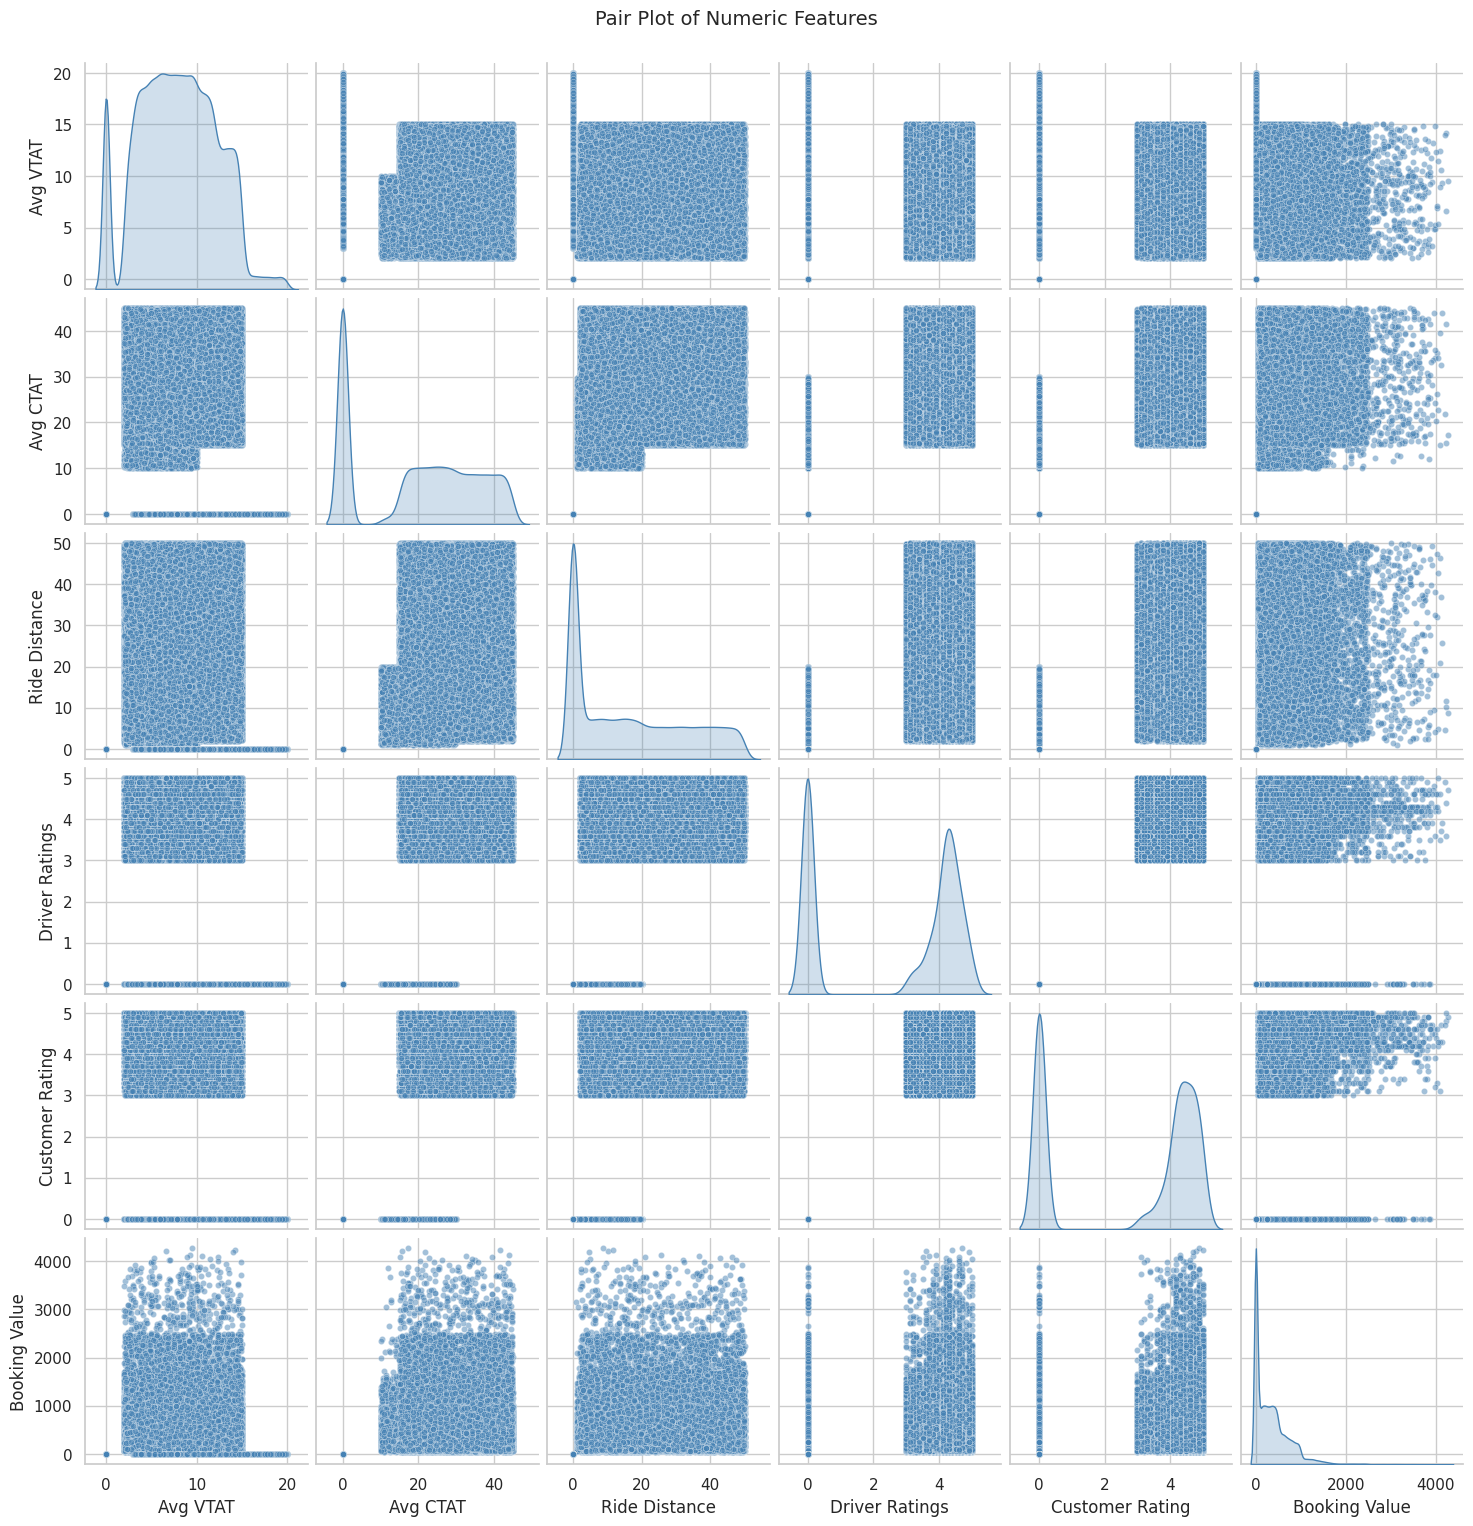

In [ ]:
sns.set(style="whitegrid")

temp1_col = [ 'Avg VTAT', 'Avg CTAT', 'Ride Distance', 'Driver Ratings', 'Customer Rating', "Booking Value"]

pair = sns.pairplot(
    df[temp1_col],
    diag_kind="kde",
    plot_kws={'alpha':0.5, 's':20, 'color':'#4682B4'},
    diag_kws={'color':'#4682B4'}
)

pair.fig.suptitle("Pair Plot of Numeric Features", y=1.02, fontsize=14)
plt.show()

Correlation Heatmap of Numeric Features

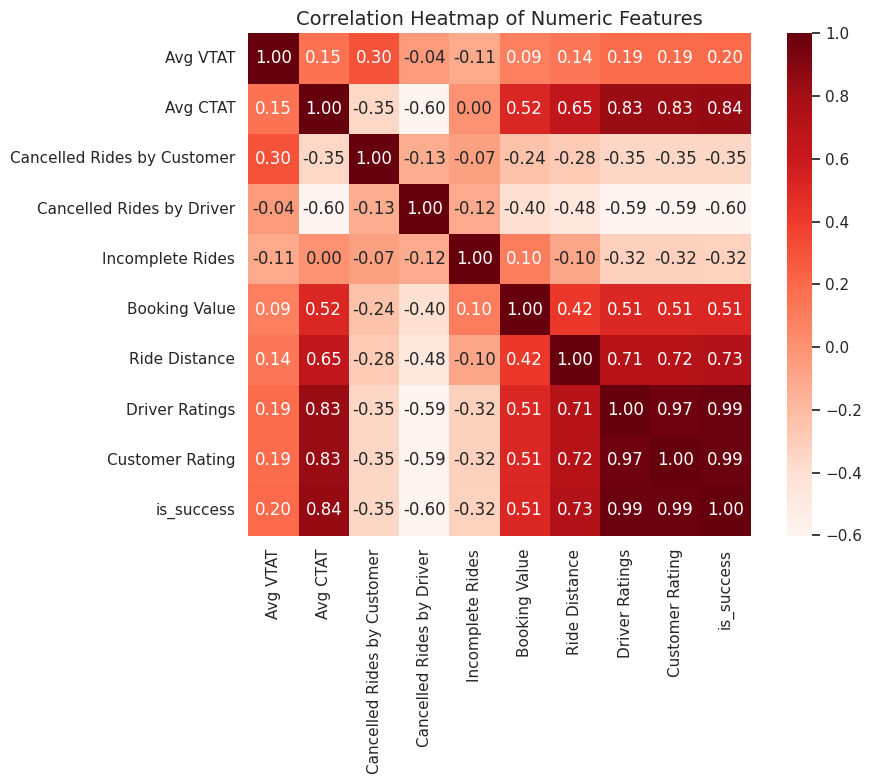

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="Reds", annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

Average Booking Value by Vehicle Type

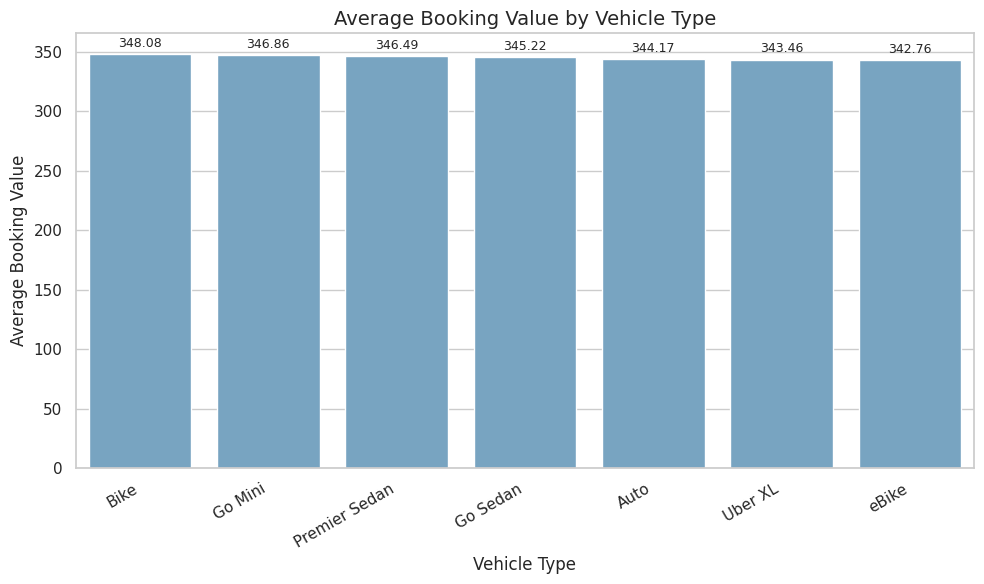

In [ ]:
plt.figure(figsize=(10,6))
avg_val = df.groupby('Vehicle Type')['Booking Value'].mean().sort_values(ascending=False)
sns.barplot(x=avg_val.index, y=avg_val.values, color="#6CA6CD")
plt.title("Average Booking Value by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type")
plt.ylabel("Average Booking Value")
plt.xticks(rotation=30, ha='right')

for i, val in enumerate(avg_val.values):
    plt.text(i, val + max(avg_val.values)*0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Average Ride Distance by Booking Status

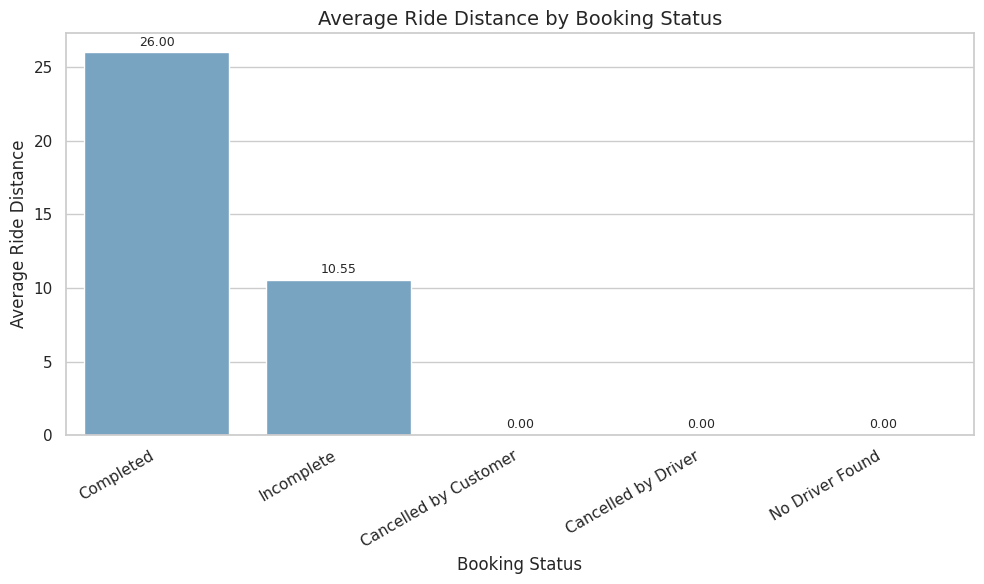

In [ ]:
plt.figure(figsize=(10,6))
avg_val = df.groupby('Booking Status')['Ride Distance'].mean().sort_values(ascending=False)
sns.barplot(x=avg_val.index, y=avg_val.values, color="#6CA6CD")
plt.title("Average Ride Distance by Booking Status", fontsize=14)
plt.xlabel("Booking Status")
plt.ylabel("Average Ride Distance")
plt.xticks(rotation=30, ha='right')

for i, val in enumerate(avg_val.values):
    plt.text(i, val + max(avg_val.values)*0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Average Booking Value by Payment Method

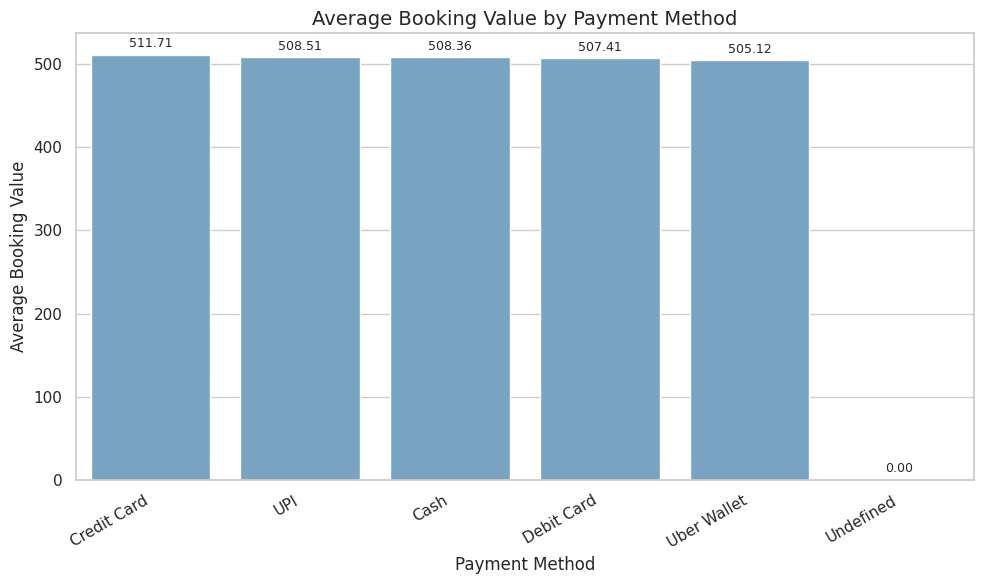

In [ ]:
plt.figure(figsize=(10,6))
avg_val = df.groupby('Payment Method')['Booking Value'].mean().sort_values(ascending=False)
sns.barplot(x=avg_val.index, y=avg_val.values, color="#6CA6CD")
plt.title("Average Booking Value by Payment Method", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Average Booking Value")
plt.xticks(rotation=30, ha='right')

for i, val in enumerate(avg_val.values):
    plt.text(i, val + max(avg_val.values)*0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Average Driver Ratings by Vehicle Type

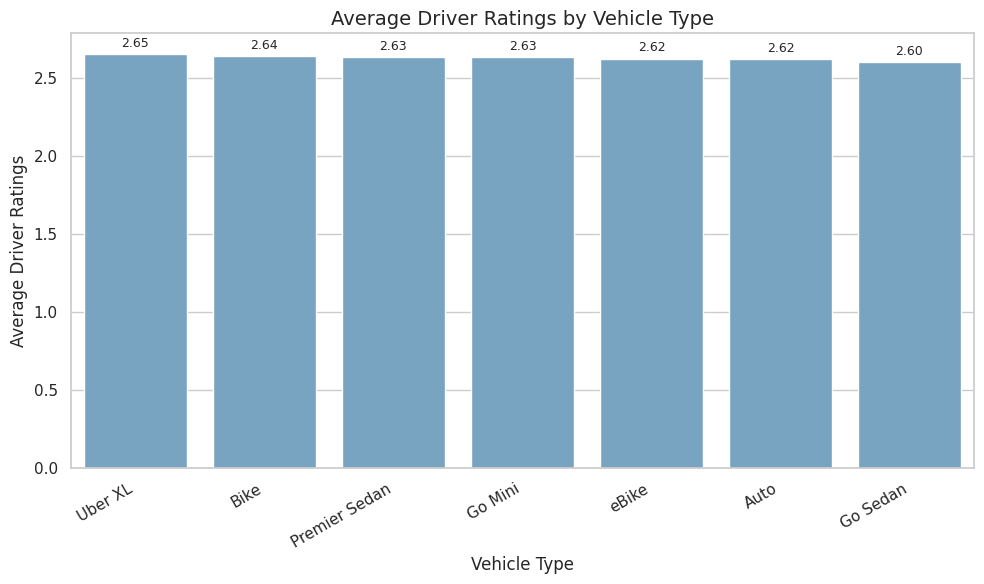

In [ ]:
plt.figure(figsize=(10,6))
avg_val = df.groupby('Vehicle Type')['Driver Ratings'].mean().sort_values(ascending=False)
sns.barplot(x=avg_val.index, y=avg_val.values, color="#6CA6CD")
plt.title("Average Driver Ratings by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type")
plt.ylabel("Average Driver Ratings")
plt.xticks(rotation=30, ha='right')

for i, val in enumerate(avg_val.values):
    plt.text(i, val + max(avg_val.values)*0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Average Customer Rating by Vehicle Type

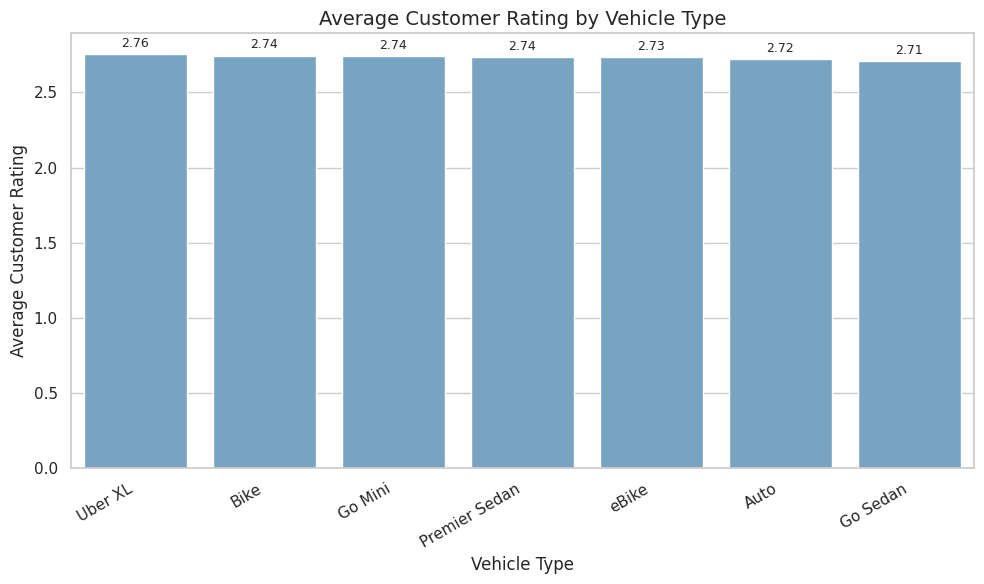

In [ ]:
plt.figure(figsize=(10,6))
avg_val = df.groupby('Vehicle Type')['Customer Rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_val.index, y=avg_val.values, color="#6CA6CD")
plt.title("Average Customer Rating by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type")
plt.ylabel("Average Customer Rating")
plt.xticks(rotation=30, ha='right')

for i, val in enumerate(avg_val.values):
    plt.text(i, val + max(avg_val.values)*0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Time-based Analysis



      Month  total_bookings  avg_booking_value  avg_distance  cancel_rate
0   2024-01           12861         342.980250     16.740923    38.177436
1   2024-02           11927         342.566446     16.499969    38.224197
2   2024-03           12719         359.162513     16.926141    37.463637
3   2024-04           12199         348.699811     16.803902    37.437495
4   2024-05           12778         338.134215     16.555120    38.135859
5   2024-06           12440         347.721865     16.925898    37.644695
6   2024-07           12897         338.522370     16.670147    38.543847
7   2024-08           12636         335.826923     16.513798    38.429883
8   2024-09           12248         342.210402     16.661079    38.422600
9   2024-10           12651         349.155798     17.023503    37.514821
10  2024-11           12394         350.443360     16.775997    38.203970
11  2024-12           12250         352.621878     16.937714    37.787755


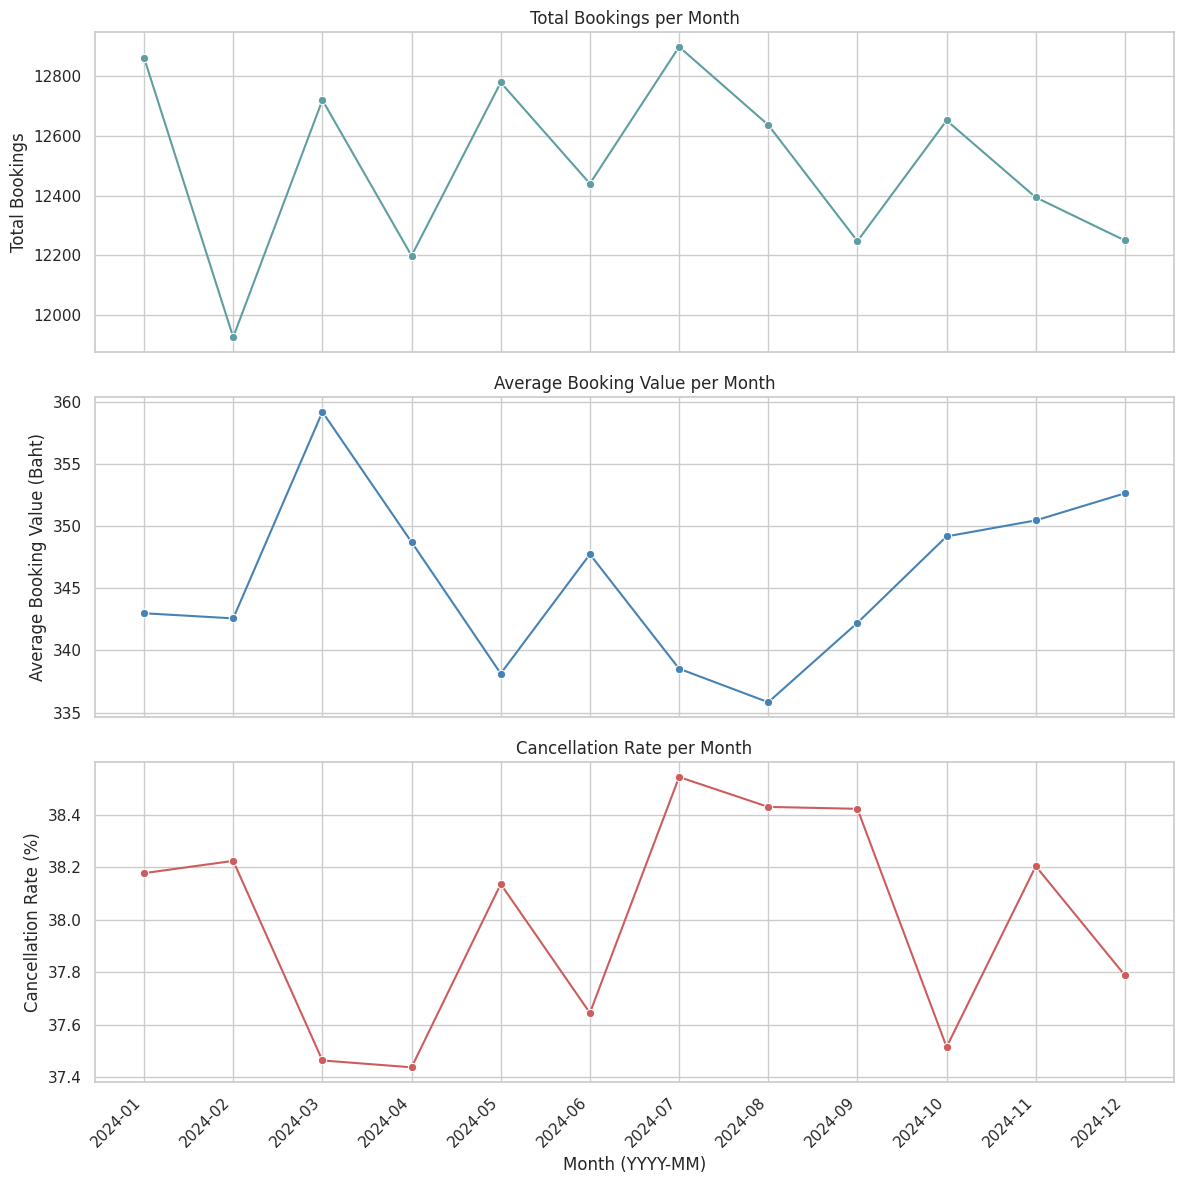

In [ ]:
sns.set(style="whitegrid")

df_time = df.copy()

df_time['Date'] = pd.to_datetime(df_time['Date'], errors='coerce')

df_time['Month'] = df_time['Date'].dt.to_period('M').astype(str)

df_monthly = (
    df_time.groupby('Month')
    .agg(
        total_bookings=('Booking ID', 'count'),
        avg_booking_value=('Booking Value', 'mean'),
        avg_distance=('Ride Distance', 'mean'),
        cancel_rate=('Booking Status', lambda x: (x != 'Completed').mean() * 100)
    )
    .reset_index()
)

print(df_monthly.head(12))

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# จำนวนการจองรายเดือน
sns.lineplot(data=df_monthly, x='Month', y='total_bookings', marker='o', ax=axes[0], color="#5F9EA0")
axes[0].set_title("Total Bookings per Month")
axes[0].set_ylabel("Total Bookings")

# มูลค่าการจองเฉลี่ยรายเดือน
sns.lineplot(data=df_monthly, x='Month', y='avg_booking_value', marker='o', ax=axes[1], color="#4682B4")
axes[1].set_title("Average Booking Value per Month")
axes[1].set_ylabel("Average Booking Value (Baht)")

# อัตราการยกเลิกรายเดือน
sns.lineplot(data=df_monthly, x='Month', y='cancel_rate', marker='o', ax=axes[2], color="#CD5C5C")
axes[2].set_title("Cancellation Rate per Month")
axes[2].set_ylabel("Cancellation Rate (%)")

plt.xlabel("Month (YYYY-MM)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Training model

## Preprocessing

In [ ]:
# import required library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, plot_tree
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv(f"{path}/ncr_ride_bookings.csv")

In [ ]:
target = "Booking Status"
X = df.drop(columns=[target])
y = df[target]

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# impute with zero
X['Avg VTAT'].fillna(0, inplace=True)
X['Avg CTAT'].fillna(0, inplace=True)
X['Booking Value'].fillna(0, inplace=True)
X['Ride Distance'].fillna(0, inplace=True)
X['Driver Ratings'].fillna(0, inplace=True)
X['Customer Rating'].fillna(0, inplace=True)
X['Cancelled Rides by Customer'].fillna(0, inplace=True)
X['Cancelled Rides by Driver'].fillna(0, inplace=True)
X['Incomplete Rides'].fillna(0, inplace=True)

#impute with unknown
X['Payment Method'].fillna("Unknown", inplace=True)

# drop out
X = X.drop(columns='Reason for cancelling by Customer')
X = X.drop(columns='Driver Cancellation Reason')
X = X.drop(columns='Incomplete Rides Reason')
X = X.drop(columns='Booking ID')
X = X.drop(columns='Customer ID')

/tmp/ipython-input-54387630.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Avg VTAT'].fillna(0, inplace=True)
/tmp/ipython-input-54387630.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [ ]:
# Format date & time
X['Date'] = pd.to_datetime(X['Date'], errors='coerce')
X['Time'] = pd.to_datetime(X['Time'], errors='coerce')

X['Hour'] = X['Time'].dt.hour
X['Weekday'] = X['Date'].dt.weekday
X['IsWeekend'] = X['Weekday'].isin([5,6]).astype(int)

X.drop(columns=['Date', 'Time'], inplace=True)

/tmp/ipython-input-3775089085.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X['Time'] = pd.to_datetime(X['Time'], errors='coerce')


## Create pipeline

In [ ]:
X.head(10)

,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Hour,Weekday,IsWeekend
0,eBike,Palam Vihar,Jhilmil,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,Unknown,12,5,1
1,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0.0,0.0,1.0,237.0,5.73,0.0,0.0,UPI,18,4,0
2,Auto,Khandsa,Malviya Nagar,13.4,25.8,0.0,0.0,0.0,627.0,13.58,4.9,4.9,Debit Card,8,4,0
3,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0.0,0.0,0.0,416.0,34.02,4.6,5.0,UPI,17,0,0
4,Bike,Ghitorni Village,Khan Market,5.3,19.6,0.0,0.0,0.0,737.0,48.21,4.1,4.3,UPI,22,0,0
5,Auto,AIIMS,Narsinghpur,5.1,18.1,0.0,0.0,0.0,316.0,4.85,4.1,4.6,UPI,9,1,0
6,Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,0.0,0.0,0.0,640.0,41.24,4.0,4.1,UPI,15,0,0
7,Auto,Mayur Vihar,Cyber Hub,12.1,16.5,0.0,0.0,0.0,136.0,6.56,4.4,4.2,UPI,17,1,0
8,Go Sedan,Noida Sector 62,Noida Sector 18,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,Unknown,12,5,1
9,Auto,Rohini,Adarsh Nagar,6.1,26.0,0.0,0.0,1.0,135.0,10.36,0.0,0.0,Cash,19,0,0


In [ ]:
cat_cols = ["Pickup Location", "Drop Location", "Vehicle Type", "Payment Method"]

# Define ColumnTransformer (preprocessing)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

# Define Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42,)),
    ('model', XGBClassifier(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit pipeline with resampled data
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

In [ ]:
# performance
acc = accuracy_score(y_test, y_pred) * 100

print("Model: XGBoost tree")
print(f"Accuracy: {acc:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Model: XGBoost tree
Accuracy: 96.65%
Classification Report:
                       precision    recall  f1-score   support

Cancelled by Customer       0.97      0.54      0.69      2100
  Cancelled by Driver       0.85      0.99      0.91      5400
            Completed       1.00      1.00      1.00     18600
           Incomplete       1.00      1.00      1.00      1800
      No Driver Found       1.00      1.00      1.00      2100

             accuracy                           0.97     30000
            macro avg       0.96      0.91      0.92     30000
         weighted avg       0.97      0.97      0.96     30000



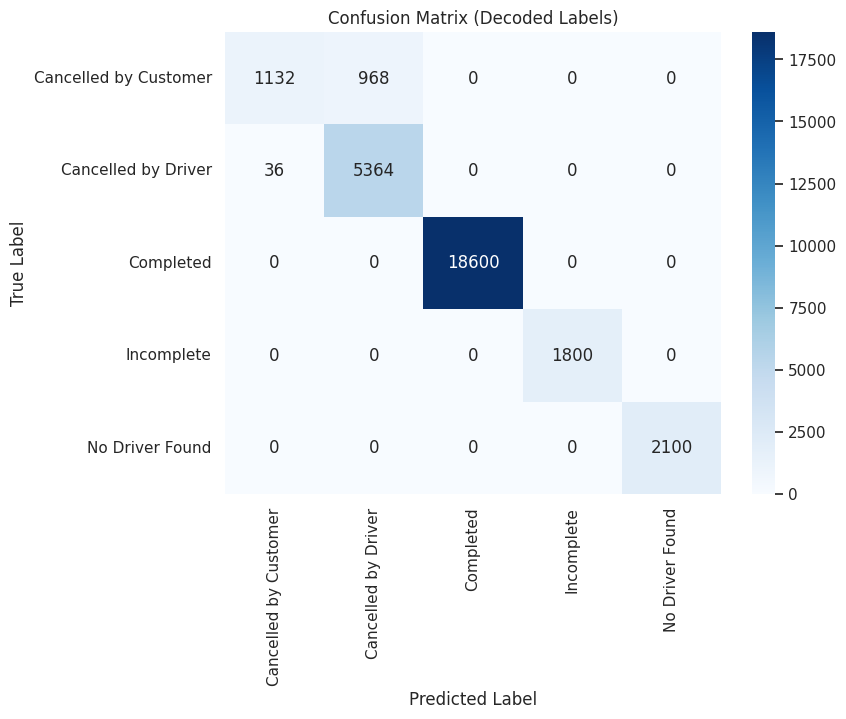

In [ ]:
# confussion matrix
labels = le.classes_

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix (Decoded Labels)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<Figure size 2400x1200 with 0 Axes>

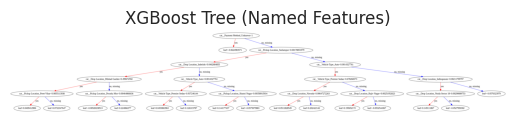

In [ ]:
# drawing
from xgboost import plot_tree
import matplotlib.pyplot as plt

preprocessor = pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out().tolist()

model = pipeline.named_steps['model']
booster = model.get_booster()
booster.feature_names = feature_names

plt.figure(figsize=(24, 12))
plot_tree(
    booster,
    tree_idx=0,
    rankdir='TB'
)
plt.title("XGBoost Tree (Named Features)")
plt.savefig("xgb_tree_named.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
from xgboost import to_graphviz

dot = to_graphviz(
    booster,
    tree_idx=0,
    rankdir='TB'
)
dot.format = 'jpg'
dot.render('xgb_tree')


'xgb_tree.jpg'